In [1]:
import networkx as nx
from itertools import combinations

# Networkx workbook 1

## BFS using Networkx

In [27]:
# Create a graph
G = nx.Graph()

# Add nodes
G.add_nodes_from([1, 2, 3, 4, 5])

# Add edges
G.add_edges_from([(1, 2), (2, 3), (1, 3), (3, 4), (4, 5)])

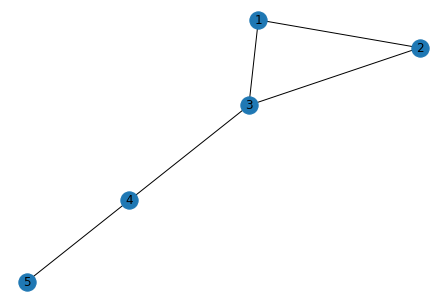

In [28]:
nx.draw(G, with_labels=True)

In [19]:
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()
    queue = [node1]

    for node in queue:
        neighbors = list(G.neighbors(node))
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            break

        else:
            visited_nodes.add(node)
            queue.extend([n for n in neighbors if n not in visited_nodes])

        # Check to see if the final element of the queue has been reached
        if node == queue[-1]:
            print('Path does not exist between nodes {0} and {1}'.format(node1, node2))

            # Place the appropriate return statement
            return False

In [20]:
path_exists(G, 2, 5)

Path exists between nodes 2 and 5


True

## Find triangle cliques in a graph

In [21]:
# Create a graph
G = nx.Graph()

# Add nodes
G.add_nodes_from([1, 2, 3, 4, 5])

# Add edges
G.add_edges_from([(1, 2), (2, 3), (2, 4), (3, 4), (4, 5)])  # One tringle clique between 2, 3 and 4.

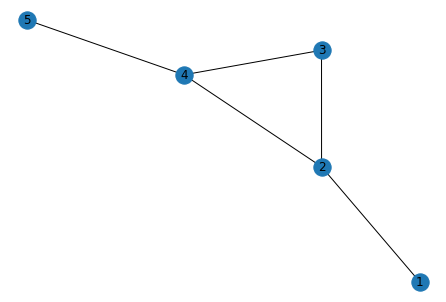

In [26]:
nx.draw(G, with_labels=True)

In [23]:
def in_tri_clique(G, node):
    """
    Checks whether a node `n` in graph `G` is in a triangle clique or not.

    Returns a boolean.
    """
    in_tri_clique = False

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(node), 2):

        # Check if an edge exists between n1 and n2
        if G.has_edge(n1, n2):
            in_tri_clique = True
            break
    return in_tri_clique


def nodes_in_triangle(G, n):
    """
    Returns the nodes in a graph `G` that are involved in a triangle relationship with the node `n`.
    """
    triangle_nodes = set([n])

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if n1 and n2 have an edge between them
        if G.has_edge(n1, n2):

            # Add n1 to triangle_nodes
            triangle_nodes.add(n1)

            # Add n2 to triangle_nodes
            triangle_nodes.add(n2)

    return triangle_nodes


In [24]:
for i in range(1, 6):
  print(f'Node `{i}` is in the triangular clique: {in_tri_clique(G, i)}')

Node `1` is in the triangular clique: False
Node `2` is in the triangular clique: True
Node `3` is in the triangular clique: True
Node `4` is in the triangular clique: True
Node `5` is in the triangular clique: False


In [25]:
nodes_in_triangle(G, 2)

{2, 3, 4}

## Finding maximal cliques

In [31]:
# Create a graph
G = nx.barbell_graph(5, 1)

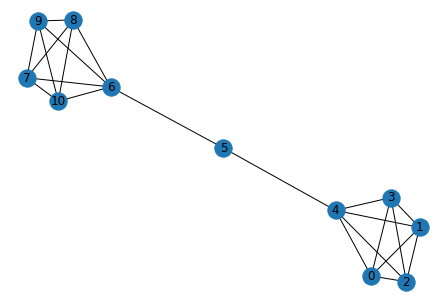

In [32]:
nx.draw(G, with_labels=True)

In [33]:
# Find maximum cliques
list(nx.find_cliques(G))

[[4, 0, 1, 2, 3], [4, 5], [6, 5], [6, 7, 8, 9, 10]]

## Subgraphs

In [34]:
# Create a graph
G = nx.erdos_renyi_graph(n=30, p=.25)

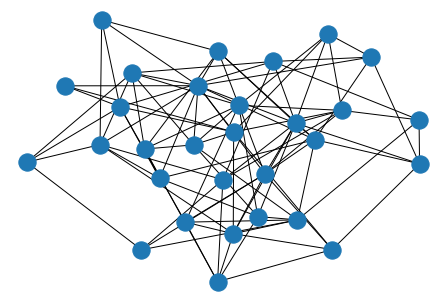

In [35]:
nx.draw(G)

In [45]:
# Get a subgraph

# 1. Get neighors of your node of interest
nodes = list(G.neighbors(17))

# 2. Append the original node of interest to the list
nodes.append(17)

# 3. Get the subgraph
S = G.subgraph(nodes)

[4, 5, 6, 7, 9, 13, 17]


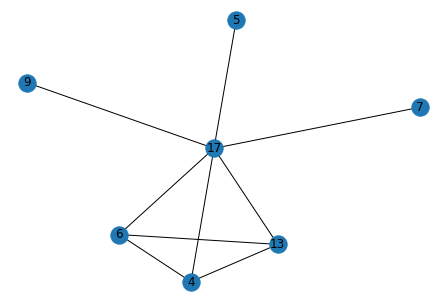

In [46]:
print(nodes)
nx.draw(S, with_labels=1)